# Netflix Movies & Tv Shows - Dataset

## Data Preparation and Cleaning

> Tasks:
>
> - Load the dataset into a data frame using Pandas
> - Explore the number of rows & columns, ranges of values etc.
> - Handle missing, incorrect and invalid data
> - Perform any additional steps (parsing dates, creating additional columns, merging multiple dataset etc.)

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
style.use('dark_background')

### Read Csv and Print Info

In [3]:
netfx_df = pd.read_csv('netflix_titles.csv')
print("-------INFO------")
print(netfx_df.info())

-------INFO------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB
None


### Description:

In [4]:
print("-------Describe--------")
print(netfx_df.describe())

-------Describe--------
       release_year
count   7787.000000
mean    2013.932580
std        8.757395
min     1925.000000
25%     2013.000000
50%     2017.000000
75%     2018.000000
max     2021.000000


### Drop Rows With Na Values

In [5]:
print("Shape Before Filteration:")
print(netfx_df.shape)
netfx_df.dropna(inplace=True)
print("Shape After Filteration:")
print(netfx_df.shape)

Shape Before Filteration:
(7787, 12)
Shape After Filteration:
(4808, 12)


### Columns

In [6]:
print("Columns:")
print(netfx_df.columns)

Columns:
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')


### Sample

In [7]:
print("Sample:")
print(netfx_df.sample(2))

Sample:
     show_id   type               title      director  \
7667   s7668  Movie  World Trade Center  Oliver Stone   
2084   s2085  Movie          F the Prom    Benny Fine   

                                                   cast        country  \
7667  Nicolas Cage, Michael Peña, Maggie Gyllenhaal,...  United States   
2084  Cameron Palatas, Richard Karn, Cheri Oteri, Da...  United States   

             date_added  release_year rating duration  \
7667  November 20, 2019          2006  PG-13  129 min   
2084      March 5, 2018          2017  TV-MA   92 min   

                       listed_in  \
7667  Action & Adventure, Dramas   
2084   Comedies, Romantic Movies   

                                            description  
7667  Working under treacherous conditions, an army ...  
2084  Maddy and Cole were inseparable before high sc...  


### Changing The Format of duration from object to int by removing extra strings like min and season,etc.

### Also count the total number of hours and seasons in dataset.

In [8]:
netfx_sum = netfx_df.query('type == "Movie"')
netfx_sum = netfx_sum['duration'].str.replace(r' min', '').astype(int)
netfx_sum.sum()

478514

In [9]:
netfx_sum2 = netfx_df.query('type == "TV Show"')
netfx_sum2 = netfx_sum2['duration'].str.replace(r'[" Seasons", " Season"]', '').astype(int)
netfx_sum2.sum()

262

## Exploratory Analysis and Visualization


> Task:
> 
> - Compute the mean, sum, range and other interesting statistics for numeric columns
> - Explore distributions of numeric columns using histograms etc.
> - Explore relationship between columns using scatter plots, bar charts etc.
> - Make a note of interesting insights from the exploratory analysis

In [13]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
#matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

**Top Countries With Highest No. of movies or Tv Shows.**

In [14]:
netfx_bycountry = netfx_df.groupby('country').country.count().to_frame('Count').reset_index().sort_values('Count',ascending=False).head(10)
netfx_bycountry = netfx_bycountry.sort_values('Count',ascending=True)
netfx_bycountry

,country,Count
192,Indonesia,67
272,Philippines,70
357,Turkey,76
227,Japan,76
317,Spain,83
100,Egypt,87
39,Canada,104
369,United Kingdom,174
173,India,832
440,United States,1653


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


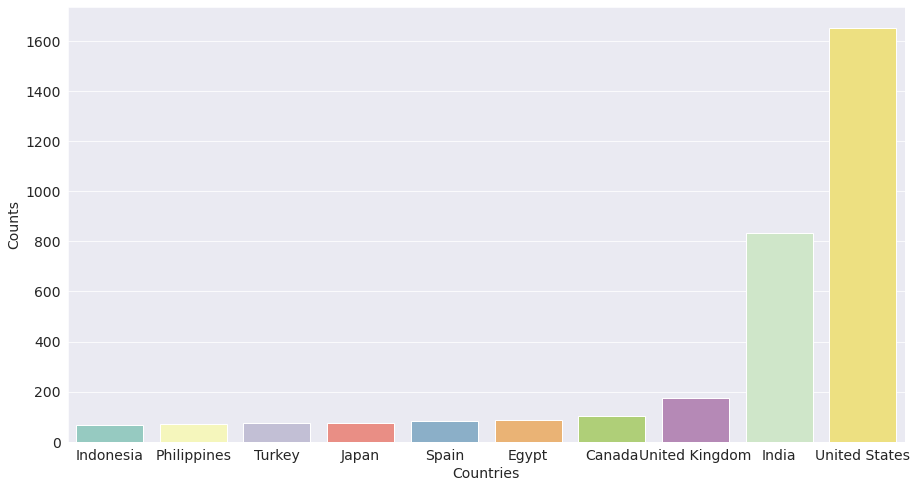

In [29]:
plt.figure(figsize=(15,8));
sns.barplot('country','Count',data=netfx_bycountry);
plt.xlabel('Countries');
plt.ylabel('Counts');

**Total No. Of Movies Released Each Year From 2010 to 2020**

In [16]:
netfx_byyear = netfx_df.query('type == "Movie"').groupby('release_year').release_year.count().to_frame('Count').reset_index().sort_values('Count',ascending=False).head(10)
netfx_byyear = netfx_byyear.sort_index(ascending=True)
netfx_byyear

,release_year,Count
59,2010,123
61,2012,146
62,2013,180
63,2014,217
64,2015,329
65,2016,552
66,2017,627
67,2018,607
68,2019,464
69,2020,345


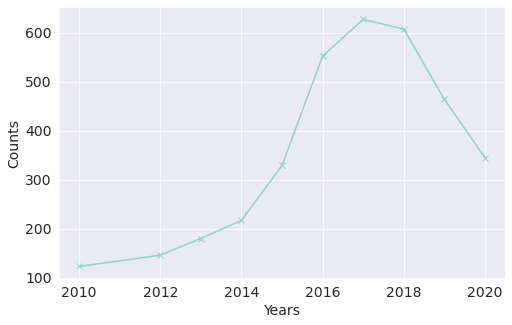

In [32]:
plt.figure(figsize=(8,5));
plt.xlabel('Years');
plt.ylabel('Counts');
plt.plot(netfx_byyear.release_year,netfx_byyear.Count,marker='x');

**Total No. Of Movies Listed In Each Rating Categories**

In [18]:
netfx_byrate = netfx_df.groupby('rating').rating.count().to_frame('Count').reset_index().sort_values('Count',ascending=False).head(10)
netfx_byrate = netfx_byrate.sort_values('Count',ascending=True)
netfx_byrate

,rating,Count
2,NR,62
11,TV-Y7,69
10,TV-Y,71
7,TV-G,80
3,PG,238
4,PG-13,375
9,TV-PG,413
5,R,654
6,TV-14,1133
8,TV-MA,1665


/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/conda/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


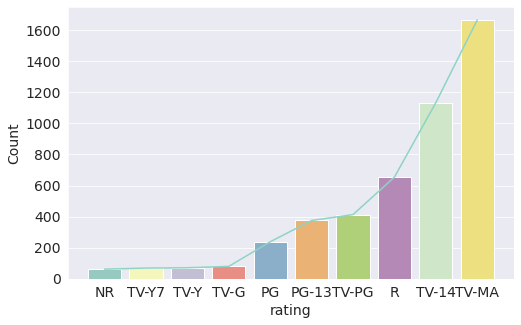

In [33]:
plt.figure(figsize=(8,5));
sns.barplot('rating','Count',data=netfx_byrate);
sns.lineplot('rating','Count',data=netfx_byrate);

**Complete history trend of total no. of movies being released each year from 1940 to 2020.**

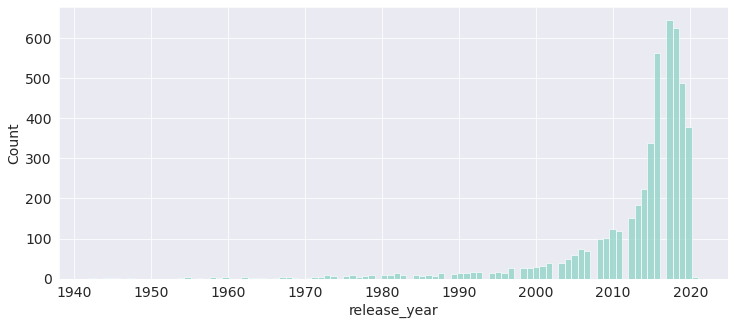

In [35]:
plt.figure(figsize=(12,5));
sns.histplot(netfx_df.release_year);

**Classification of major movie genres.**

In [36]:
comedies = netfx_df["listed_in"].str.contains(r'Comed.*')
comedies = netfx_df[comedies].title.count()
action = netfx_df["listed_in"].str.contains(r'Actio.*')
action = netfx_df[action].title.count()
horror = netfx_df["listed_in"].str.contains(r'Horro.*')
horror = netfx_df[horror].title.count()
drama = netfx_df["listed_in"].str.contains(r'Drama.*')
drama = netfx_df[drama].title.count()
adventure = netfx_df["listed_in"].str.contains(r'Adventu.*')
adventure = netfx_df[adventure].title.count()
scifi = netfx_df["listed_in"].str.contains(r'Sci-Fi.*')
scifi = netfx_df[scifi].title.count()
dat = pd.DataFrame({'Classification': [comedies, action , horror, drama, adventure, scifi]},
                  index=['Comedy', 'Action', 'Horror', 'Drama', 'Adventure', 'Sci-Fi'])

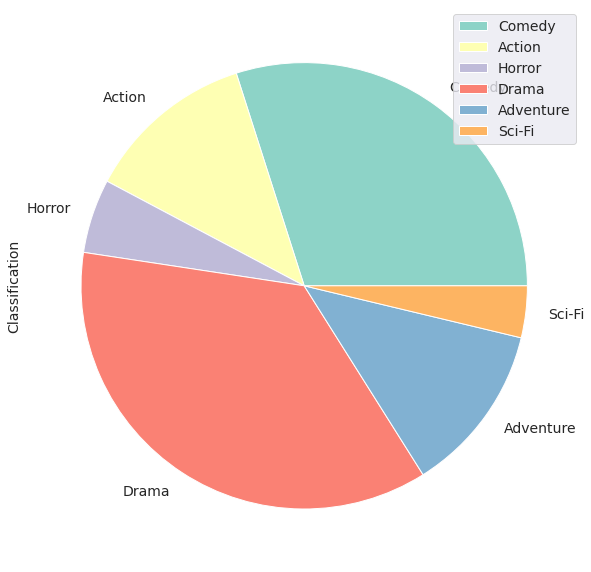

In [38]:
dat.plot.pie(y='Classification', figsize=(10, 12));

Let us save and upload our work to Jovian before continuing

### Which Tv Shows having 5 or more than 5 Seasons ?

In [43]:
netfx_byseasons = netfx_df.query('type == "TV Show"')
netfx_byseasons = netfx_byseasons.query('duration >= "5 Season"').sort_values('duration',ascending = False)
netfx_byseasons.head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1181,s1182,TV Show,Call the Midwife,Philippa Lowthorpe,"Vanessa Redgrave, Bryony Hannah, Helen George,...",United Kingdom,"September 15, 2020",2020,TV-MA,9 Seasons,"British TV Shows, International TV Shows, TV D...",This period drama set in impoverished East Lon...
4404,s4405,TV Show,Naruto,Hayato Date,"Junko Takeuchi, Chie Nakamura, Noriaki Sugiyam...",Japan,"September 1, 2019",2006,TV-14,9 Seasons,"Anime Series, International TV Shows","Guided by the spirit demon within him, orphane..."
584,s585,TV Show,Arrow,James Bamford,"Stephen Amell, Katie Cassidy, David Ramsey, Wi...",United States,"February 5, 2020",2019,TV-14,8 Seasons,"Crime TV Shows, TV Action & Adventure","Based on DC Comics' Green Arrow, an affluent p..."
5291,s5292,TV Show,Royal Pains,Jay Chandrasekhar,"Mark Feuerstein, Paulo Costanzo, Reshma Shetty...",United States,"May 18, 2017",2016,TV-PG,8 Seasons,"TV Comedies, TV Dramas",Dr. Hank Lawson unexpectedly gets a career upg...
6415,s6416,TV Show,The Great British Baking Show,Andy Devonshire,"Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...",United Kingdom,"September 25, 2020",2020,TV-14,8 Seasons,"British TV Shows, Reality TV",A talented batch of amateur bakers face off in...


### Indian Movies Released In 2020 ?

In [46]:
netfx_df.query('type == "Movie"' and 'country == "India"').query('release_year == 2020').head(5)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
244,s245,Movie,A truthful Mother,Ravishankar Venkateswaran,"Revathi, Roger Narayanan, Sneha Ravishankar, V...",India,"March 31, 2020",2020,TV-Y7,85 min,Children & Family Movies,"Facing a drought, a hungry tiger and a noble c..."
362,s363,Movie,AK vs AK,Vikramaditya Motwane,"Anil Kapoor, Anurag Kashyap",India,"December 25, 2020",2020,TV-MA,109 min,"Comedies, Dramas, International Movies","After a public spat with a movie star, a disgr..."
368,s369,Movie,Ala Vaikunthapurramuloo,Trivikram Srinivas,"Allu Arjun, Pooja Hegde, Tabu, Sushanth, Nivet...",India,"February 27, 2020",2020,TV-14,162 min,"Action & Adventure, Comedies, Dramas",After growing up enduring criticism from his f...
510,s511,Movie,Andhakaaram,V Vignarajan,"Vinoth Kishan, Arjun Das, Pooja Ramachandran, ...",India,"November 24, 2020",2020,TV-14,171 min,"Horror Movies, International Movies, Thrillers","As a blind librarian, dispirited cricketer and..."
605,s606,Movie,Asura Guru,A. Raajdheep,"Vikram Prabhu, Subbaraju, Mahima Nambiar, Yogi...",India,"June 13, 2020",2020,TV-14,117 min,"Dramas, International Movies","For a tech-savvy thief, elaborate robberies an..."
